In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Titanic_Dataset/train.csv')

test_df = pd.read_csv('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Titanic_Dataset/test.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: ylabel='Density'>

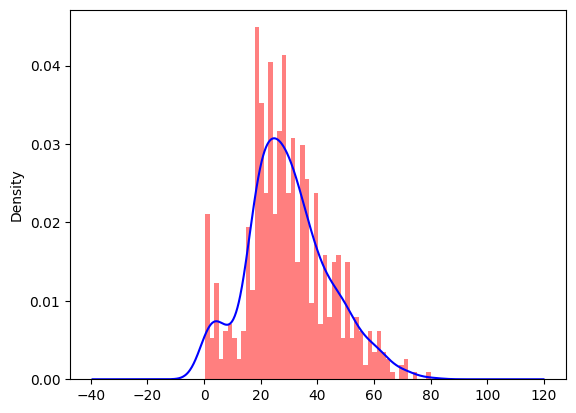

In [17]:
ax = train_df["Age"].hist(bins = 50, density = True, color = 'red', alpha = 0.5)
train_df['Age'].plot(kind = 'density', color = 'blue')

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S


<Axes: xlabel='Embarked', ylabel='count'>

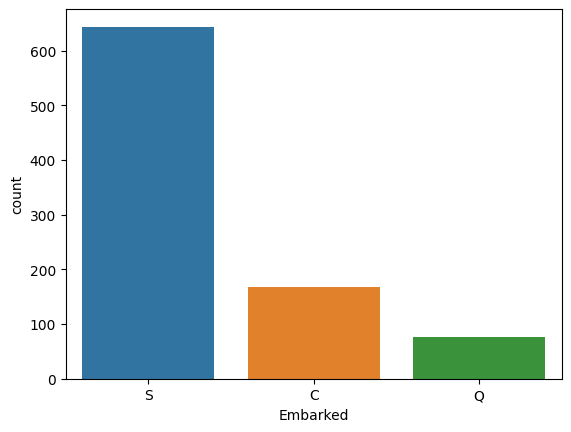

In [27]:
print(train_df['Embarked'].value_counts())
print(train_df['Embarked'].value_counts().idxmax())
sns.countplot(x = 'Embarked', data = train_df)

In [21]:
train_data = train_df.copy()

In [22]:
train_df['Age'].median()

28.0

In [24]:
train_data['Age'].fillna(train_df['Age'].median(), inplace = True)
train_data['Embarked'].fillna(train_df.Embarked.value_counts().idxmax(), inplace = True)
train_data.drop('Cabin', axis = 1, inplace = True)

In [26]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

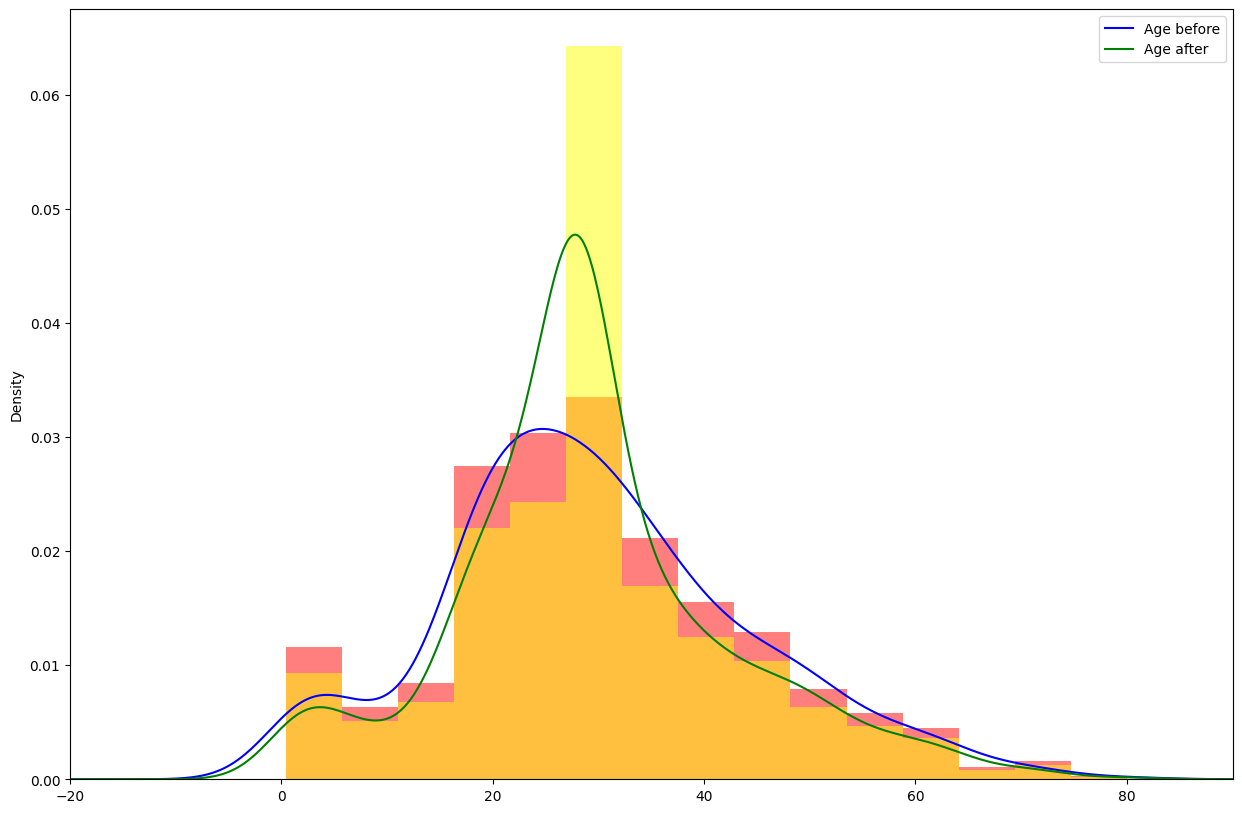

In [35]:
plt.figure(figsize = (15, 10))
ax = train_df["Age"].hist(bins = 15, density = True, color = 'red', alpha = 0.5)
train_df['Age'].plot(kind = 'density', color = 'blue')
ax = train_data["Age"].hist(bins = 15, density = True, color = 'yellow', alpha = 0.5)
train_data['Age'].plot(kind = 'density', color = 'green')
plt.xlim(-20, 90)
ax.legend(['Age before', 'Age after'])

In [36]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [37]:
train_data = pd.get_dummies(train_data, columns = ['Sex', 'Embarked'])

In [38]:
train_data.drop('PassengerId', axis = 1, inplace = True)
train_data.drop('Name', axis = 1, inplace = True)
train_data.drop('Ticket', axis = 1, inplace = True)

In [39]:
# train_data['Sex_female'] = np.where(train_data['Sex_female'] == True, 1, 0)
# train_data['Sex_male'] = np.where(train_data['Sex_male'] == True, 1, 0)
# train_data['Embarked_C'] = np.where(train_data['Embarked_C'] == True, 1, 0)
# train_data['Embarked_Q'] = np.where(train_data['Embarked_Q'] == True, 1, 0)
# train_data['Embarked_S'] = np.where(train_data['Embarked_S'] == True, 1, 0)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


C:\Users\bhatt\AppData\Local\Temp\ipykernel_29000\2853737527.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_data['Age'][train_data.Survived == 1], color = 'green', shade = True)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_29000\2853737527.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data['Age'][train_data.Survived == 0], color = 'red', shade = True)


(-10.0, 90.0)

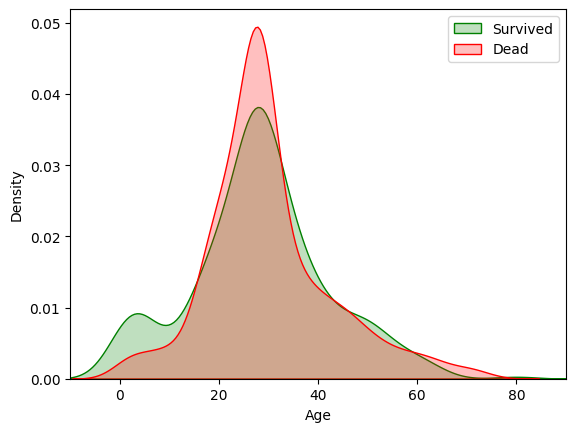

In [43]:
ax = sns.kdeplot(train_data['Age'][train_data.Survived == 1], color = 'green', shade = True)
sns.kdeplot(train_data['Age'][train_data.Survived == 0], color = 'red', shade = True)
plt.legend(['Survived', 'Dead'])
plt.xlim(-10, 90)

C:\Users\bhatt\AppData\Local\Temp\ipykernel_29000\3830224982.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_data['Fare'][train_data.Survived == 1], color = 'green', shade = True)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_29000\3830224982.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data['Fare'][train_data.Survived == 0], color = 'red', shade = True)


(-50.0, 200.0)

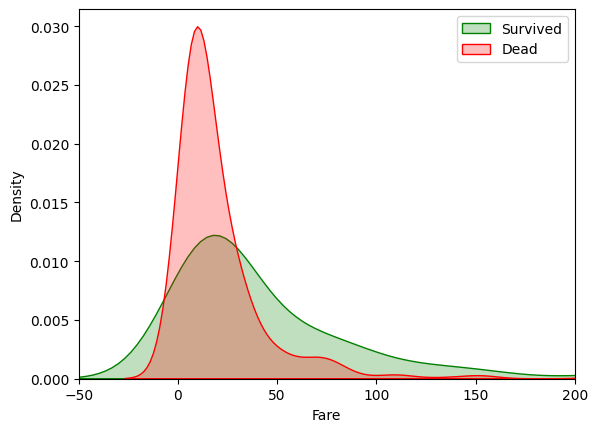

In [49]:
ax = sns.kdeplot(train_data['Fare'][train_data.Survived == 1], color = 'green', shade = True)
sns.kdeplot(train_data['Fare'][train_data.Survived == 0], color = 'red', shade = True)
plt.legend(['Survived', 'Dead'])
plt.xlim(-50, 200)

<Axes: xlabel='Pclass', ylabel='Survived'>

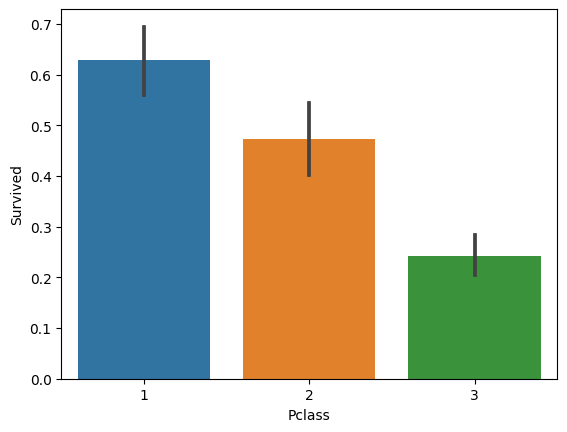

In [52]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train_data)

<Axes: xlabel='Embarked', ylabel='Survived'>

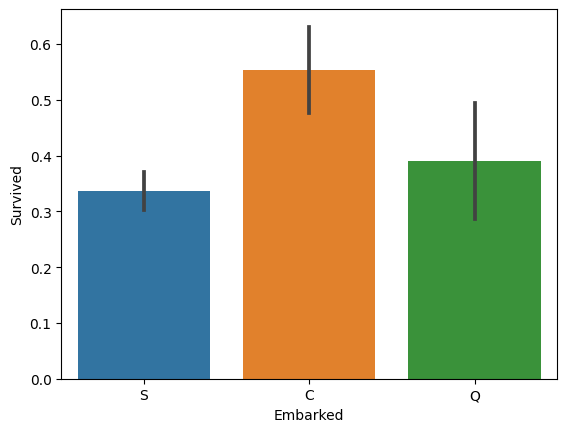

In [53]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train_df)

<Axes: xlabel='SibSp', ylabel='Survived'>

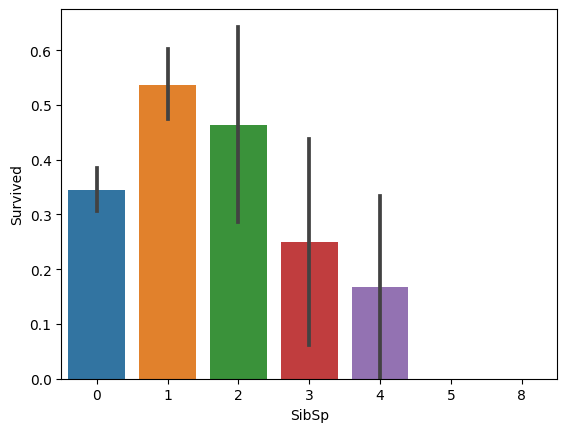

In [54]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train_df)

<Axes: xlabel='Parch', ylabel='Survived'>

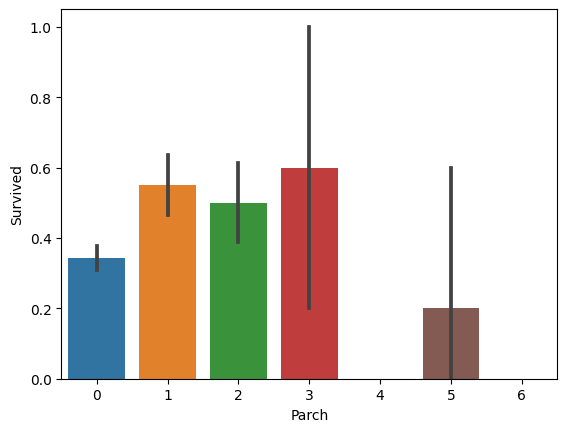

In [55]:
sns.barplot(x = 'Parch', y = 'Survived', data = train_df)

<Axes: xlabel='Sex', ylabel='Survived'>

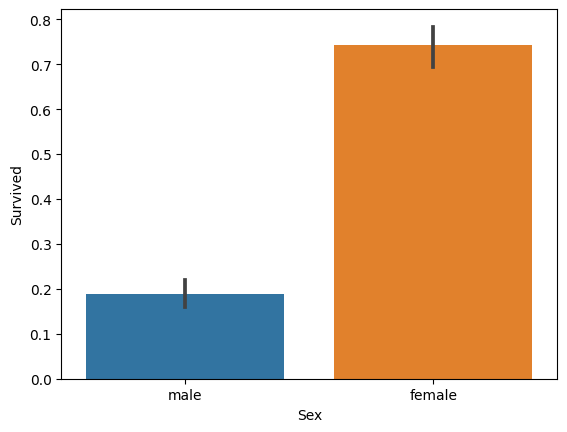

In [56]:
sns.barplot(x = 'Sex', y = 'Survived', data = train_df)

<Axes: xlabel='Sex', ylabel='Fare'>

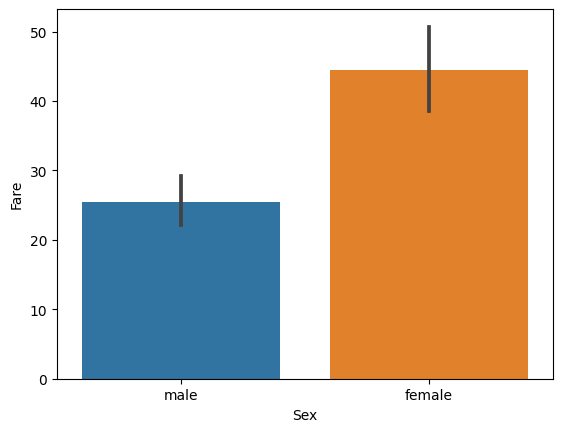

In [58]:
sns.barplot(x = 'Sex', y = 'Fare', data = train_df)

In [59]:
train_data['Travel_Alone'] = np.where((train_data['SibSp'] + train_data['Parch']) > 0, 0, 1)

In [60]:
train_data.drop('SibSp', axis = 1, inplace = True)
train_data.drop('Parch', axis = 1, inplace = True)

In [61]:
train_data

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Travel_Alone
0,0,3,22.0,7.2500,0,1,0,0,1,0
1,1,1,38.0,71.2833,1,0,1,0,0,0
2,1,3,26.0,7.9250,1,0,0,0,1,1
3,1,1,35.0,53.1000,1,0,0,0,1,0
4,0,3,35.0,8.0500,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,0,1,0,0,1,1
887,1,1,19.0,30.0000,1,0,0,0,1,1
888,0,3,28.0,23.4500,1,0,0,0,1,0
889,1,1,26.0,30.0000,0,1,1,0,0,1


<Axes: xlabel='Travel_Alone', ylabel='Survived'>

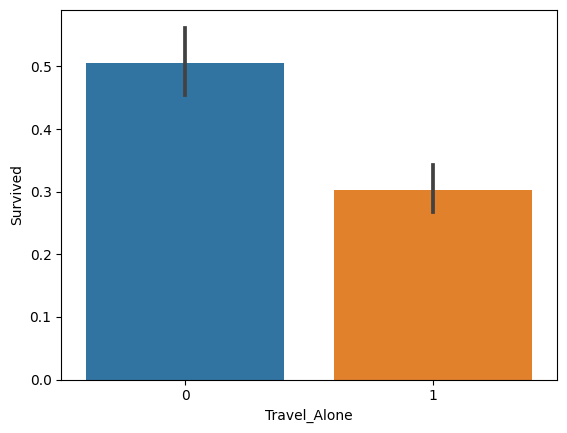

In [62]:
sns.barplot(x = 'Travel_Alone', y = 'Survived', data = train_data)

<Axes: >

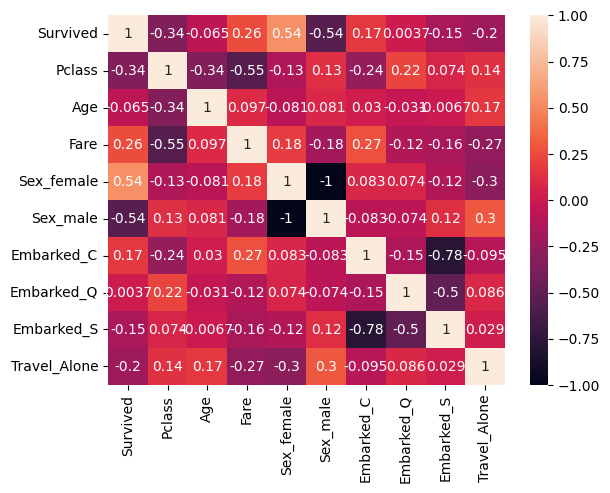

In [64]:
sns.heatmap(train_data.corr(), annot = True)